In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler,StandardScaler

from sklearn.linear_model import LogisticRegression,LinearRegression,RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [3]:
df=pd.read_csv(r"E:\10.python\project\advertiment_prediction\advertiment-subscription-prediction\artifacts\Social_Network_Ads.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


<AxesSubplot:>

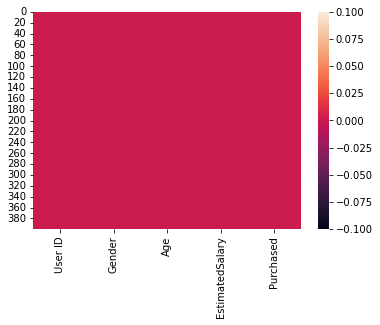

In [5]:
sns.heatmap(df.isnull())

<AxesSubplot:>

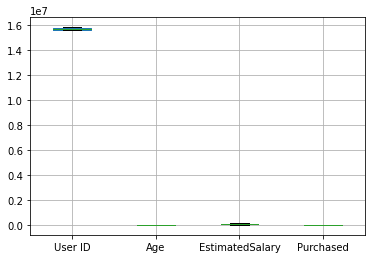

In [6]:
df.boxplot()

In [7]:
1. No outliers
2. No Missing values

SyntaxError: invalid syntax (3840085184.py, line 1)

In [8]:
df["User ID"].nunique()

400

In [9]:
# drop User ID column

In [10]:
df.drop(["User ID"],axis=1,inplace=True)

In [11]:
# label encoding on Gender

In [12]:
df['Gender'].replace({"Male":1,"Female":0},inplace=True)

In [13]:
x=df.drop(['Purchased'],axis=1)
y=df['Purchased']
# y

In [14]:
# train test split

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=5,stratify=y)
x_train[0:2]

,Gender,Age,EstimatedSalary
235,1,46,79000
114,1,42,80000


## Normalisation

In [17]:
norm_model=MinMaxScaler()
norm_model.fit(x_train)
x_train=norm_model.transform(x_train)
x_test=norm_model.transform(x_test)

In [45]:
[x_train.columns]
# x_test [x_test.columns]

In [46]:
x_train

,Gender,Age,EstimatedSalary
235,1.0,0.666667,0.474074
114,1.0,0.571429,0.481481
388,1.0,0.690476,0.140741
288,1.0,0.547619,0.474074
186,0.0,0.047619,0.496296
...,...,...,...
14,1.0,0.000000,0.496296
267,1.0,0.452381,0.437037
368,1.0,0.476190,0.414815
373,1.0,0.976190,0.851852


# standardition

In [47]:
# std_model=StandardScaler()
# std_model.fit(x_train[["Age","Age","EstimatedSalary"]])
# x_train[["Age","Age","EstimatedSalary"]]=std_model.transform(x_train[["Age","Age","EstimatedSalary"]])
# x_test[["Age","Age","EstimatedSalary"]]=std_model.transform(x_test[["Age","Age","EstimatedSalary"]])

# Logistic Regression

In [19]:
Log_model=LogisticRegression()
Log_model.fit(x_train,y_train)

LogisticRegression()

In [20]:
# Testing evalution

In [21]:
y_pred=Log_model.predict(x_test)

acc_score=accuracy_score(y_test,y_pred)
print("Accuracy score by Logistic Regression ::",acc_score)

conf_matrix=confusion_matrix(y_test,y_pred)
print("conf_matrix by Logistic Regression ::\n",conf_matrix)

class_report=classification_report(y_test,y_pred)
print("classification report by Logistic Regression ::\n",class_report)

Accuracy score by Logistic Regression :: 0.8125
conf_matrix by Logistic Regression ::
 [[48  3]
 [12 17]]
classification report by Logistic Regression ::
               precision    recall  f1-score   support

           0       0.80      0.94      0.86        51
           1       0.85      0.59      0.69        29

    accuracy                           0.81        80
   macro avg       0.82      0.76      0.78        80
weighted avg       0.82      0.81      0.80        80



In [22]:
# Training evalution

In [23]:
y_pred_train=Log_model.predict(x_train)

acc_score1=accuracy_score(y_train,y_pred_train)
print("Accuracy score by Logistic Regression ::",acc_score1)

conf_matrix1=confusion_matrix(y_train,y_pred_train)
print("conf_matrix by Logistic Regression ::\n",conf_matrix1)

class_report1=classification_report(y_train,y_pred_train)
print("classification report by Logistic Regression ::\n",class_report1)

Accuracy score by Logistic Regression :: 0.81875
conf_matrix by Logistic Regression ::
 [[193  13]
 [ 45  69]]
classification report by Logistic Regression ::
               precision    recall  f1-score   support

           0       0.81      0.94      0.87       206
           1       0.84      0.61      0.70       114

    accuracy                           0.82       320
   macro avg       0.83      0.77      0.79       320
weighted avg       0.82      0.82      0.81       320



In [24]:
# sns.kdeplot(df['Age'])

In [25]:
# sns.kdeplot(df['EstimatedSalary'])

In [26]:
# df['EstimatedSalary'].sort_values()

In [27]:
KNN_model=KNeighborsClassifier(p=2)
KNN_model.fit(x_train,y_train)

KNeighborsClassifier()

In [28]:
y_pred=KNN_model.predict(x_test)

acc_score=accuracy_score(y_test,y_pred)
print("Accuracy score by Logistic Regression ::",acc_score)

conf_matrix=confusion_matrix(y_test,y_pred)
print("conf_matrix by Logistic Regression ::\n",conf_matrix)

class_report=classification_report(y_test,y_pred)
print("classification report by Logistic Regression ::\n",class_report)

Accuracy score by Logistic Regression :: 0.8875
conf_matrix by Logistic Regression ::
 [[47  4]
 [ 5 24]]
classification report by Logistic Regression ::
               precision    recall  f1-score   support

           0       0.90      0.92      0.91        51
           1       0.86      0.83      0.84        29

    accuracy                           0.89        80
   macro avg       0.88      0.87      0.88        80
weighted avg       0.89      0.89      0.89        80



In [29]:
y_pred_train=KNN_model.predict(x_train)

acc_score1=accuracy_score(y_train,y_pred_train)
print("Accuracy score by Logistic Regression ::",acc_score1)

conf_matrix1=confusion_matrix(y_train,y_pred_train)
print("conf_matrix by Logistic Regression ::\n",conf_matrix1)

class_report1=classification_report(y_train,y_pred_train)
print("classification report by Logistic Regression ::\n",class_report1)

Accuracy score by Logistic Regression :: 0.925
conf_matrix by Logistic Regression ::
 [[190  16]
 [  8 106]]
classification report by Logistic Regression ::
               precision    recall  f1-score   support

           0       0.96      0.92      0.94       206
           1       0.87      0.93      0.90       114

    accuracy                           0.93       320
   macro avg       0.91      0.93      0.92       320
weighted avg       0.93      0.93      0.93       320



In [30]:
# y_p_train=KNN_model.predict(a)
# y_p_train

In [31]:
# a=norm_model.transform([df.loc[114,["Gender","Age","EstimatedSalary"]]])

In [32]:
# x_train

In [33]:
# df.loc[114,:]

In [34]:
# y_pred_train[0:2]

In [35]:
# x_train.head(2)

In [36]:
# df.loc[235,:]

In [66]:
# Hyper parameter tuning

In [67]:
g_model=KNeighborsClassifier()
hyp={"p":[1,2],
    "n_neighbors":np.arange(3,20)}
gscv_model=GridSearchCV(g_model,hyp,cv=5)
gscv_model.fit(x_train,y_train)
gscv_model.best_estimator_

KNeighborsClassifier(p=1)

In [52]:
g1_model=KNeighborsClassifier()
hyp={"p":[1,2],
    "n_neighbors":np.arange(3,20)}
rmcv_model=RandomizedSearchCV(g1_model,hyp,cv=5)
rmcv_model.fit(x_train,y_train)
rmcv_model.best_estimator_

KNeighborsClassifier(p=1)

In [53]:
# save model

In [37]:
import pickle

In [38]:
pickle.dump(KNN_model,open("K_model.pkl",'wb'))

In [39]:
pickle.dump(norm_model,open("Scale_model.pkl",'wb'))

In [57]:
x_train.columns

Index(['Gender', 'Age', 'EstimatedSalary'], dtype='object')

In [58]:
df

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,0,46,41000,1
396,1,51,23000,1
397,0,50,20000,1
398,1,36,33000,0


In [ ]:
pickle.load(open("Normal_Scale_model.pkl",'wb'))

In [226]:
y_pred

array([0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [227]:
,y_pred_train

array([1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,

In [228]:
y_train

235    1
114    0
388    1
288    0
186    0
      ..
14     0
267    0
368    0
373    1
353    0
Name: Purchased, Length: 320, dtype: int64

In [231]:
df.iloc[114,:]

Gender                 1
Age                   42
EstimatedSalary    80000
Purchased              0
Name: 114, dtype: int64

In [7]:
import pandas as pd
import pickle

In [9]:
dd=[{"Gender":"Male","Age":42,"EstimatedSalary":80000}]
def pred(df):
    df=pd.DataFrame(df)
    df['Gender'].replace({"Male":1,"Female":0},inplace=True)
    print(df)
    normal_model=pickle.load(open(r"E:\10.python\project\advertiment_prediction\model_api\Normal_Scale_model.pkl","rb"))
    normal_model.transform(df)

    model_adv=pickle.load(open(r"E:\10.python\project\advertiment_prediction\model_api\KNN_model.pkl",'rb'))
    result=model_adv.predict(df) 
    return result
ys=pred(dd)  
ys

   Gender  Age  EstimatedSalary
0       1   42            80000


array([1], dtype=int64)

In [89]:
array=norm_model.transform([[1.0,35,20000]])

C:\Users\91703\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [91]:
KNN_model.predict(array)

C:\Users\91703\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [ ]:
Male	35	20000	

In [235]:
y_pred_train

array([1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,

In [239]:
accuracy_score(ys,y_pred_train)

1.0

In [48]:
x_train

,Gender,Age,EstimatedSalary
235,1.0,0.666667,0.474074
114,1.0,0.571429,0.481481
388,1.0,0.690476,0.140741
288,1.0,0.547619,0.474074
186,0.0,0.047619,0.496296
...,...,...,...
14,1.0,0.000000,0.496296
267,1.0,0.452381,0.437037
368,1.0,0.476190,0.414815
373,1.0,0.976190,0.851852


In [243]:
df.loc[288,:]

Gender                 1
Age                   41
EstimatedSalary    79000
Purchased              0
Name: 288, dtype: int64